In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

qaanaaq gl
broken hill au
busselton au
castro cl
tanout ne
mar del plata ar
illoqqortoormiut gl
ushuaia ar
visnes no
ancud cl
ushuaia ar
kavieng pg
tsihombe mg
murray bridge au
tasiilaq gl
kapaa us
tiksi ru
hilo us
provideniya ru
barentsburg sj
norman wells ca
punta arenas cl
saskylakh ru
yellowknife ca
rikitea pf
san patricio mx
puerto ayora ec
hamilton bm
haines junction ca
barrow us
bluff nz
ninh binh vn
cape town za
rikitea pf
kapit my
qaanaaq gl
qaanaaq gl
lebu cl
rikitea pf
ushuaia ar
rikitea pf
bluff nz
saint george bm
mataura pf
albany au
rikitea pf
vaini to
pittsburg us
upernavik gl
mataura pf
bluff nz
ponta do sol pt
rikitea pf
chokurdakh ru
hithadhoo mv
jamestown sh
iqaluit ca
ende id
hilo us
onalaska us
oleksandrivka ua
qaanaaq gl
panguipulli cl
illoqqortoormiut gl
mar del plata ar
greytown za
jamestown sh
cockburn harbour tc
rikitea pf
ribeira grande pt
kieta pg
taolanaro mg
ushuaia ar
benemerito de las americas mx
hermanus za
kapaa us
alyangula au
bredasdorp za
grootfonte

hermanus za
mataura pf
mataura pf
saint-pierre pm
saint anthony ca
muskegon us
tonj sd
barentsburg sj
namibe ao
san quintin mx
sentyabrskiy ru
mayo ca
felidhoo mv
kapaa us
sentyabrskiy ru
puerto narino co
baruun-urt mn
barrow us
kaplice cz
punta arenas cl
hermanus za
provideniya ru
punta arenas cl
sao filipe cv
lamu ke
belushya guba ru
jamestown sh
dunedin nz
sisimiut gl
margate za
rikitea pf
puerto ayora ec
ushuaia ar
westport ie
vila velha br
inuvik ca
padang id
dubovskoye ru
upernavik gl
tiksi ru
egvekinot ru
yellowknife ca
bulgan mn
isshiki jp
carnarvon au
yellowknife ca
maniitsoq gl
beringovskiy ru
butaritari ki
tsihombe mg
atuona pf
taolanaro mg
cherskiy ru
rikitea pf
fairbanks us
davila ph
kaitangata nz
jamestown sh
kruisfontein za
vaini to
illoqqortoormiut gl
shenjiamen cn
airai pw
pevek ru
whitehorse ca
mutsamudu km
ozgon kg
illoqqortoormiut gl
provideniya ru
tual id
busselton au
mar del plata ar
kaabong ug
rikitea pf
busselton au
san francisco ar
castro cl
atuona pf
atuona pf

new norfolk au
camocim br
zaysan kz
albany au
zalantun cn
wanning cn
burlington us
avarua ck
bahia blanca ar
atbasar kz
vostok ru
yulara au
vaini to
san carlos de bariloche ar
ust-omchug ru
illoqqortoormiut gl
jamestown sh
zaraza ve
mataura pf
ouesso cg
ushuaia ar
busselton au
namie jp
tilichiki ru
olafsvik is
nikolskoye ru
georgetown sh
broken hill au
borlange se
antalaha mg
atuona pf
carnarvon au
aasiaat gl
namibe ao
kulhudhuffushi mv
arraial do cabo br
lima pe
san felipe mx
tamiahua mx
kapaa us
ponta do sol cv
torbay ca
puerto ayora ec
novaya ladoga ru
georgetown sh
kavaratti in
yatou cn
hihifo to
saint george bm
hilo us
sentyabrskiy ru
christchurch nz
albany au
khatanga ru
mataura pf
mataura pf
port blair in
emerald au
qaanaaq gl
lisakovsk kz
setermoen no
ghanzi bw
portales us
punta arenas cl
maxixe mz
atuona pf
lolua tv
cherskiy ru
jalu ly
atuona pf
ushuaia ar
bani walid ly
talnakh ru
klaksvik fo
yellowknife ca
hobart au
thompson ca
ushuaia ar
puerto escondido mx
severo-kurilsk ru

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b8ee007073380abd43fb4965a6f379d


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | broken hill
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | tanout
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | visnes
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | murray bridge
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | saskylakh
Processi

Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | tayshet
Processing Record 43 of Set 4 | kuche
City not found. Skipping...
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | shebunino
Processing Record 46 of Set 4 | salinopolis
Processing Record 47 of Set 4 | bilma
Processing Record 48 of Set 4 | leh
Processing Record 49 of Set 4 | angoche
Processing Record 50 of Set 4 | hambantota
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | redding
Processing Record 3 of Set 5 | fort morgan
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | mindelo
Processing Record 7 of Set 5 | kruisfontein
Processing Record 8 of Set 5 | eureka
Processing Record 9 of Set 5 | teya
Processing Record 10 of Set 5 | pekan
Processing Record 11 of Set 5 | roald
Processing Record 12 of Set 5 | iralaya
Processing Record 13 of Set 5 | meyu

Processing Record 31 of Set 8 | paradwip
City not found. Skipping...
Processing Record 32 of Set 8 | nouakchott
Processing Record 33 of Set 8 | soyo
Processing Record 34 of Set 8 | charters towers
Processing Record 35 of Set 8 | chapais
Processing Record 36 of Set 8 | arkhangelskoye
Processing Record 37 of Set 8 | bitung
Processing Record 38 of Set 8 | pestovo
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | cidreira
Processing Record 41 of Set 8 | bone
Processing Record 42 of Set 8 | campbell river
Processing Record 43 of Set 8 | praia
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | odweyne
Processing Record 46 of Set 8 | lima
Processing Record 47 of Set 8 | payo
Processing Record 48 of Set 8 | arraial do cabo
Processing Record 49 of Set 8 | pozo colorado
Processing Record 50 of Set 8 | pirgos
Processing Record 1 of Set 9 | tocopilla
Processing Record 2 of Set 9 | kutum
Processing Record 3 of Set 9 | saldanha
Processing Record 4 of S

Processing Record 19 of Set 12 | emerald
Processing Record 20 of Set 12 | lisakovsk
Processing Record 21 of Set 12 | setermoen
Processing Record 22 of Set 12 | ghanzi
Processing Record 23 of Set 12 | portales
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | lolua
City not found. Skipping...
Processing Record 26 of Set 12 | bani walid
Processing Record 27 of Set 12 | kudahuvadhoo
Processing Record 28 of Set 12 | nokaneng
Processing Record 29 of Set 12 | kawalu
Processing Record 30 of Set 12 | ugoofaaru
Processing Record 31 of Set 12 | elizabeth city
Processing Record 32 of Set 12 | wolow
Processing Record 33 of Set 12 | bressanone
Processing Record 34 of Set 12 | wanlaweyn
Processing Record 35 of Set 12 | north branch
Processing Record 36 of Set 12 | saint-gabriel
Processing Record 37 of Set 12 | lata
Processing Record 38 of Set 12 | marinhas
Processing Record 39 of Set 12 | srednekolymsk
Processing Record 40 of Set 12 | tiarei
Processing Record 41 of Set 12 | ib

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,17.87,85,0,0.72,GL,2020-04-17 21:04:34
1,Broken Hill,-31.95,141.43,46.40,70,0,3.36,AU,2020-04-17 21:04:34
2,Busselton,-33.65,115.33,54.00,61,93,7.27,AU,2020-04-17 21:04:34
3,Castro,-24.79,-50.01,59.67,49,0,2.33,BR,2020-04-17 21:04:34
4,Tanout,14.97,8.89,82.92,10,0,9.86,NE,2020-04-17 21:04:35
5,Mar Del Plata,-38.00,-57.56,70.00,52,65,11.41,AR,2020-04-17 21:04:35
6,Ushuaia,-54.80,-68.30,57.20,28,20,14.99,AR,2020-04-17 21:01:01
7,Visnes,59.36,5.22,41.00,80,0,6.93,NO,2020-04-17 21:04:35
8,Ancud,-41.87,-73.82,59.00,100,90,4.70,CL,2020-04-17 21:04:36
9,Kavieng,-2.57,150.80,81.45,76,97,4.32,PG,2020-04-17 21:04:36


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-04-17 21:04:34,77.48,-69.36,17.87,85,0,0.72
1,Broken Hill,AU,2020-04-17 21:04:34,-31.95,141.43,46.40,70,0,3.36
2,Busselton,AU,2020-04-17 21:04:34,-33.65,115.33,54.00,61,93,7.27
3,Castro,BR,2020-04-17 21:04:34,-24.79,-50.01,59.67,49,0,2.33
4,Tanout,NE,2020-04-17 21:04:35,14.97,8.89,82.92,10,0,9.86


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/17/20'

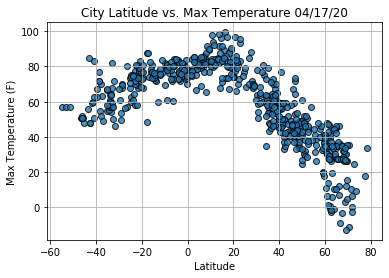

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

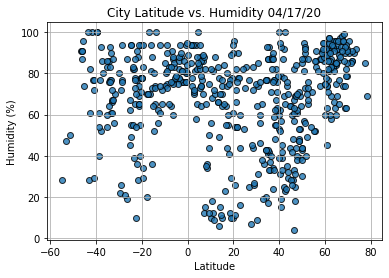

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

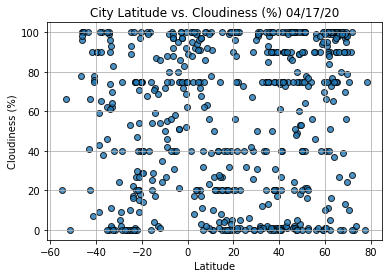

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

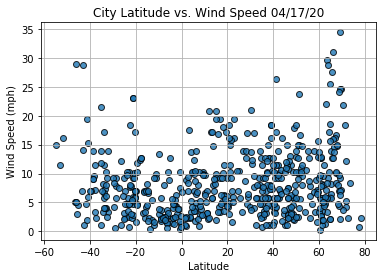

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-24-f235f13efcbc>, line 6)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))